In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm

from pipeline import SearchEngine
# from relevance import run_relevance_tests
from cf import CFRanker

In [2]:
DATA_PATH = '../data/'
RELEVANCE_TEST_PATH = DATA_PATH + 'relevance.dev.csv'

In [3]:
ranker = CFRanker()
ranker.get_scores()
ranker.get_similarities()

100%|██████████| 110/110 [00:02<00:00, 39.71it/s]


In [4]:
sim_index = ranker.sim_index

In [5]:
dataset_df = pd.read_csv(
    '../data/Google_Map_review_data_AA_DTW.csv', sep=',', header=0)
authors_list = dataset_df.author_name.unique()
stations_list = []
coor_list = set()
for row in dataset_df.itertuples():
    if (float(row.lat), float(row.lng)) not in coor_list:
        coor_list.add((float(row.lat), float(row.lng)))
        stations_list.append(row.name)
score_index = pd.DataFrame(
    index=stations_list, columns=authors_list)
for row in dataset_df.itertuples():
    score_index.loc[row.name, row.author_name] = row.rating
score_index.reset_index(drop=True, inplace=True)
score_index.head()

,P & M Eastman,Jeff Frank,Andrew Kennaugh,santosh lalwani,Trel Nadal,Benjamin Meza-Wilson,Alex Aquino,michael graf,Sarah Cohen,Benjamin Meza,...,James Adams,Anand Patil,Periwinkle,Kathy T,Chris Fisher,jobo daHobo,Sean Doran,Laura Lindsay,Venkat Didugu,Russell DuRoss
0,5,3,4,5,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,5,5,NaN,NaN,NaN,...,5,1,4,5,5,5,5,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,4,4,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
row_means = score_index.mean(axis=1, skipna=True)
score_index = score_index.apply(lambda row: row - row_means[row.name] if np.isfinite(row.sum()) else row, axis=1)
score_index.head()

,P & M Eastman,Jeff Frank,Andrew Kennaugh,santosh lalwani,Trel Nadal,Benjamin Meza-Wilson,Alex Aquino,michael graf,Sarah Cohen,Benjamin Meza,...,James Adams,Anand Patil,Periwinkle,Kathy T,Chris Fisher,jobo daHobo,Sean Doran,Laura Lindsay,Venkat Didugu,Russell DuRoss
0,1.44,-0.56,0.44,1.44,1.44,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1.551402,1.551402,NaN,NaN,NaN,...,1.551402,-2.448598,0.551402,1.551402,1.551402,1.551402,1.551402,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.777778,0.777778,1.777778,0.777778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ranker.row_means[50]

3.2222222222222223

In [9]:
search_engine = SearchEngine(max_docs=-1, cf=False)

Loading indexes...
Loading ranker...
Search Engine initialized!


/home/zim/UMSI/PlugStation-Recommendation-System/src/pipeline.py:37: DtypeWarning: Columns (10,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  self.main_index = pd.read_csv(DATASET_PATH, delimiter='\t')


In [10]:
search_engine.main_index.head()

,Station Name,Street Address,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,...,EV Connector Types,Access Code,Access Detail Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,NPS Unit Name,Maximum Vehicle Class,EV Workplace Charging
0,LADWP - Truesdale Center,11797 Truesdale St,E,NaN,Private,Fleet use only,NaN,NaN,57.0,2.0,...,CHADEMO J1772 J1772COMBO,private,NaN,UTILITY,NaN,NaN,NaN,NaN,NaN,True
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,E,NaN,Private,NaN,NaN,NaN,4.0,NaN,...,J1772,private,NaN,UTILITY,Free,NaN,NaN,NaN,NaN,True
2,Los Angeles Convention Center,1201 S Figueroa St,E,NaN,Public,5:30am-9pm; pay lot,NaN,NaN,7.0,NaN,...,J1772,public,NaN,PARKING_GARAGE,Free; parking fee,NaN,False,NaN,LD,False
3,LADWP - John Ferraro Building,111 N Hope St,E,NaN,Private,For fleet and employee use only,NaN,NaN,338.0,12.0,...,CHADEMO J1772 J1772COMBO,private,NaN,UTILITY,NaN,NaN,NaN,NaN,LD,True
4,LADWP - Haynes Power Plant,6801 E 2nd St,E,NaN,Private,Fleet use only,NaN,NaN,19.0,1.0,...,CHADEMO J1772 J1772COMBO,private,NaN,UTILITY,NaN,NaN,NaN,NaN,NaN,True


In [11]:
search_engine.ranker.query('42.3012724951137, -83.71906207399091')

/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(


[[33257.0, 0.5797476233191815], [33258.0, 0.5797476233191815]]

In [12]:
overall_scores = []

In [ ]:
def log_scores(overall_scores, score, idx):
    for item in score['map_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'map'
        })
    for item in score['ndcg_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'ndcg'
        })
    return overall_scores

In [ ]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 0)

  0%|          | 0/38 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

MAP:  [0.0125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.025, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0.034722222222222224, 0, 0, 0, 0, 0, 0, 0, 0.12857142857142856, 0, 0, 0, 0, 0]
NDCG:  [0.23305781766536982, 0.0, 0, 0, 0.0, 0.09138637028484595, 0, 0.11128410866442684, 0, 0.06092424685656397, 0.12578267902857923, 0.0984005490287911, 0, 0.0, 0.04920027451439555, 0.20698480740207348, 0.0, 0.11464875722023267, 0.06192385945988927, 0, 0.0, 0, 0.0, 0.14484396997849897, 0.14053040633892672, 0.0, 0.0, 0.0, 0.055189942893075224, 0.031041917075015645, 0, 0.08986859162485021, 0.2619179107921319, 0.0945257492621918, 0.0, 0.0, 0, 0.03557791873909471]


[{'model': 0, 'score': 0.0125, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.025, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0.5, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score': 0, 'metric': 'map'},
 {'model': 0, 'score'

In [ ]:
overall_scores = pd.DataFrame(overall_scores)
overall_scores

,model,score,metric
0,0,0.012500,map
1,0,0.000000,map
2,0,0.000000,map
3,0,0.000000,map
4,0,0.000000,map
...,...,...,...
71,0,0.094526,ndcg
72,0,0.000000,ndcg
73,0,0.000000,ndcg
74,0,0.000000,ndcg


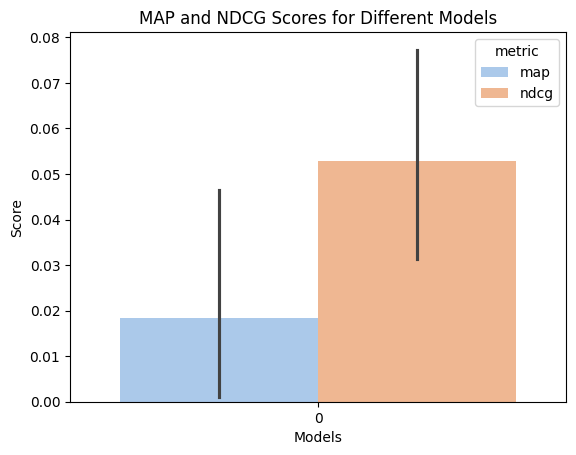

In [ ]:
plot = sns.barplot(x='model', y='score', hue='metric',
                   data=overall_scores, palette='pastel')
plot.set_xlabel('Models')
plot.set_ylabel('Score')
plot.set_title('MAP and NDCG Scores for Different Models')
plt.show()